## Plots for Distribution of Degree and Bewteenness over EC classes  

In [1]:
import pandas as pd
import seaborn as sns
import json
from matplotlib import pyplot as plt
sns.set() # S
sns.set_context("paper")
sns.set_style(style='whitegrid')

In [2]:
def load_json(path):
    ''' 
    Loads jsons given a path. 
    '''
    with open(path,'r') as f:
        data = json.load(f)
    return data


In [41]:
class Domain:

    def __init__(self,name):

        self.name = name
        
        self.path_degree = "../results/topology/degree/degree_distribution_over_EC_%s.json"%(self.name)
        
        self.path_betweenness = "../results/topology/betweenness/betweenness_distribution_over_EC_%s.json"%(self.name)

        cb = {'black':[0,0,0], 'orange':[230/255,159/255,0], 'skyblue':[86/255,180/255,233/255],
        'bluishgreen':[0,158/255,115/255], 'yellow':[240/255,228/255,66/255],'blue':[0,114/255,178/255],
        'vermillion':[213/255,94/255,0],'reddishpurple':[204/255,121/255,167/255], 'brown':[109, 22, 3]}

        #'brown': HEX #6D1603 RGB 109, 22, 3  HSL 11, 97%, 22%
        color = {'Metagenome': cb['bluishgreen'],
            'Bacteria': cb['blue'],
            'Archaea': cb['vermillion'],
            'Eukaryota': cb['orange'],
            'Pantaxa': cb['reddishpurple'],    
            'LUCA': cb['black'],
            'Biosphere': cb['skyblue']}

        self.color = color[self.name]
    


In [42]:
archaea = Domain('Archaea')
bacteria = Domain('Bacteria')
eukaryota = Domain('Eukaryota')
metagenome = Domain('Metagenome')
luca = Domain("LUCA")
biosphere = Domain("Biosphere")
pantaxa = Domain("Pantaxa")

ec_class_name = {'1':'oxidoreductases',
     '2':'transferases',
    '3': 'hydrolases',
    '4': 'lyases',
    '5': 'isomerases',
    '6': 'ligases'}


In [5]:
list_domain = [luca, archaea, bacteria, eukaryota, pantaxa, metagenome, biosphere]

data = dict()
for domain in list_domain:
    data[domain] = load_json(domain.path_degree)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


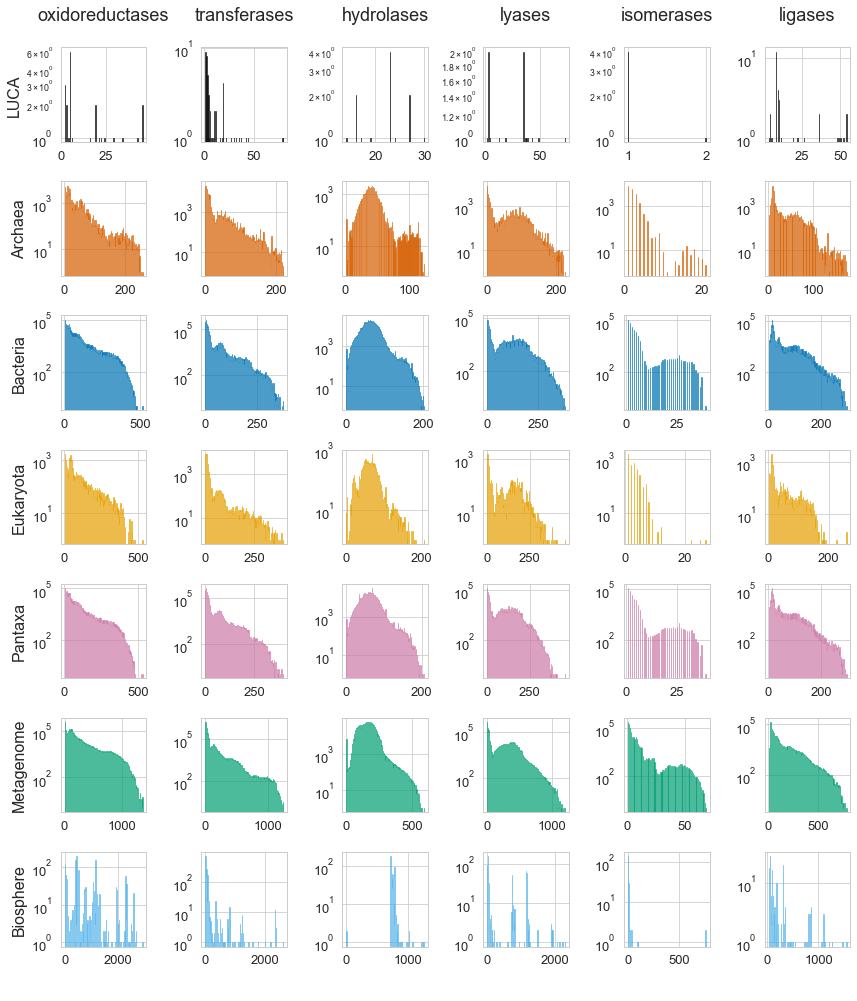

In [39]:
plt.figure(figsize=(2 * len(ec_class_name), 2 * len(list_domain))) #sharex=True, sharey=True)
j = 0
for domain in list_domain:
    i = 0
    for ec_index in range(1, len(ec_class_name) + 1):
        plt.subplot(len(list_domain), len(ec_class_name), ec_index + j)
        print(ec_index + j)
        ec_class = str(ec_index) 
        x = data[domain][ec_class]
        plt.hist(x, histtype='step', bins=200, log=True, fill=True, alpha=0.7, label=domain.name, color=domain.color)
        ax = plt.gca()
        ax.tick_params(labelsize=13)
        #ax.set_xlim([0,500])
        #ax.set_ylim([0,100000])
        i += 1
        if domain == luca:
            plt.title("%s\n"%ec_class_name[ec_class], fontsize= 18)
        if ec_index == 1:
            plt.ylabel(domain.name, fontsize= 16)
    j += i    

plt.xlabel("Degree", color="white", fontsize=25)
plt.tight_layout()
plt.savefig("../plots/degree_distribution_log.png", dpi = 300)




In [43]:

list_domain = [luca, archaea, bacteria, eukaryota, pantaxa, metagenome, biosphere]

bet_data = dict()
for domain in list_domain:
    bet_data[domain] = load_json(domain.path_betweenness)


In [ ]:
plt.figure(figsize=(2 * len(ec_class_name), 2 * len(list_domain))) #sharex=True, sharey=True)
j = 0
for domain in list_domain:
    i = 0
    for ec_index in range(1, len(ec_class_name) + 1):
        plt.subplot(len(list_domain), len(ec_class_name), ec_index + j)
        print(ec_index + j)
        ec_class = str(ec_index) 
        x = bet_data[domain][ec_class]
        plt.hist(x, histtype='step', bins=200, log=True, fill=True, alpha=0.7, label=domain.name, color=domain.color)
        ax = plt.gca()
        ax.tick_params(labelsize=13)
        #ax.set_xlim([0,500])
        #ax.set_ylim([0,100000])
        i += 1
        if domain == luca:
            plt.title("%s\n"%ec_class_name[ec_class], fontsize= 18)
        if ec_index == 1:
            plt.ylabel(domain.name, fontsize= 16)
    j += i    

plt.xlabel("Betweenness", color="white", fontsize=25)
plt.tight_layout()
plt.savefig("../plots/betweenness_distribution_log.png", dpi = 300)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
